# Has conflict reporting become more dangerous?

>Journalists are afforted some protection against direct attack during a conflict by International Humanitarian Law. As state in Customary Rules of International armed conflicts and the non-international armed conflicts(IAC/NIAC), "Civilian journalists engaged in professional missions in areas of armed conflict must be respected and protected as long as they are not taking a direct part in hostilities." 

>This detailed accounts of every journalist killed on duty worldwide was compiled by Committee to Protect Journalists (CPJ), since 1992. CPJ claims to have investated each and every death. After investigation and verification, classify them as work related if the journalist was killed in line of duty: murder, crossfire, and/or while carrying out a dangerous assignment. Cases involving unclear motives, but with a potential link to journalism, are classified as "unconfirmed" and CPJ continues to investigate.


>What is the trend in journalist deaths over time and how does this differ by type of death, job, coverage, and country?

>Are there differences by sex and/or nationality?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import linregress
import sklearn
from sklearn.linear_model import LinearRegression

In [3]:
# Data frame of journalist death since 1992 to 2016
df_cpj = pd.read_csv('cpj.csv')

In [4]:
DateRange = np.arange(1992,2017)
count = []
EmptyDF = []
DateRange

for year in DateRange:
    somth = df_cpj[df_cpj['Date'].str.contains('{}'.format(year))]
    count = [year, somth['Name'].count()]
    EmptyDF.append(count)
df_2 = pd.DataFrame()
df_2 = df_2.append(EmptyDF)
df_2.columns = ["Year","Count"]

Relationship between death of journalist and time is not strong (Rvalue = 0.59), but it is satistically significant (Pvalue = 0). Positive slope indicates a overall increase in death of journalist while on duty over the years but it is not large enough to definitly conclude the null hypotheis. 

LinregressResult(slope=2.0076923076923077, intercept=-3952.2153846153847, rvalue=0.58511061445092716, pvalue=0.0021240483762197671, stderr=0.58021801567728903)

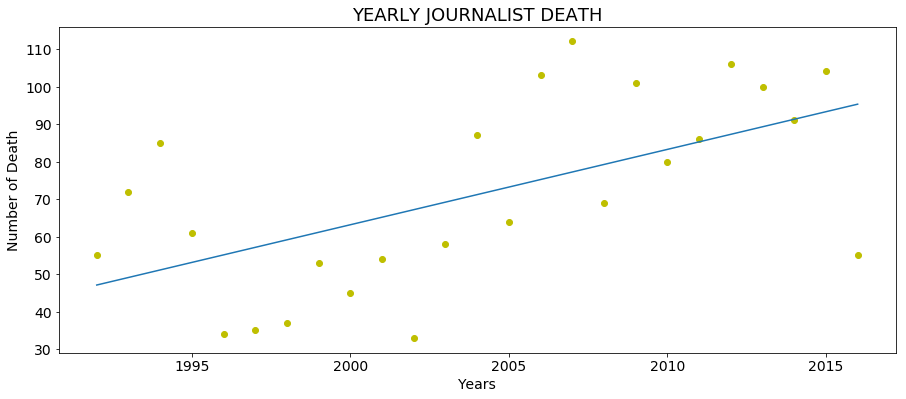

In [14]:
plt.figure(figsize=(15,6))

fit = np.polyfit(df_2["Year"], df_2["Count"],1)
fit_fn = np.poly1d(fit) 

plt.title('YEARLY JOURNALIST DEATH')
plt.xlabel("Years")
plt.ylabel('Number of Death')

plt.rc('axes', titlesize=18)
plt.rc('font', size=14)


plt.plot(df_2["Year"], df_2["Count"], 'yo', df_2["Year"], fit_fn(df_2["Year"]))
linregress(df_2["Year"], df_2["Count"])

|   Variable   |   Value  |
|:-------------|:--------:|
|slope         |2.00      |
|intercept     | -3952.21 |
|rvalue        |0.59      |
|pvalue        |0.00      |
|stderr        |0.58      |

Although journalist have faced danger in every armed conflict, changing nature of warfare might have made them a greater target. Nature of armed confilicts have changed, we no longer face convential state adversire, it changed not only who fought but also how it was fought. Below is a graph of the same data set, better visiulized as bar graph.


In [ ]:
#plt.figure(figsize=(15,6))
#plt.scatter(df_2["Year"], df_2["Count"])
#plt.xticks(range(df_2["Year"].min(), df_2["Year"].max() +2, 2))

#plt.ylabel("Number of Death")
#plt.xlabel("Years")
#plt.show()

fig, ax = plt.subplots(figsize=(15,6))
rects = ax.bar(df_2["Year"], df_2["Count"])

plt.xticks(range(df_2["Year"].min(), df_2["Year"].max() + 1, 2))

ax.set_title('Yearly Journalist Deaths')
ax.set_xlabel("Years")
ax.set_ylabel('Number of Death')

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')
plt.rc('axes', titlesize=18)
plt.rc('font', size=14)
autolabel(rects)
plt.show()

We don't know if journalist are being targed because increase in death could be largely due to increase in news agency.  Targed killing of journalist catagorized by 'Murder' label would indicate a increasce in danger, death in other catagories is due to randomness, without purpos or intention.

In [ ]:
t-test

In [ ]:
TypeMurder = df_cpj[df_cpj['Type_death'] == 'Murder']
TypeCross = df_cpj[df_cpj['Type_death'] == 'Crossfire/Combat-Related']
TypeDanger = df_cpj[df_cpj['Type_death'] == 'Dangerous Assignment']
TypeUnknown = df_cpj[df_cpj['Type_death'] == 'Unknown']
TypeUndetermined = df_cpj['Name'].count() + TypeUnknown['Name'].count() - (TypeMurder['Name'].count() + 
                    TypeCross['Name'].count() + 
                    TypeDanger['Name'].count() + 
                    TypeUnknown['Name'].count())

m = 100*TypeMurder['Name'].count()/df_cpj['Name'].count()
c = 100*TypeCross['Name'].count()/df_cpj['Name'].count()
d = 100*TypeDanger['Name'].count()/df_cpj['Name'].count()
#uk = TypeUnknown['Name'].count() #/df_cpj['Name'].count()
u = 100*TypeUndetermined/df_cpj['Name'].count()

d = {'DeathType': ['Murder', 'Crossfire','Dangerous Assignment', 'Undetermined'], 'Percentage': [m,c,d,u]}
TypeofDeath = pd.DataFrame(data=d)
TypeofDeath.round({'Percentage': 2})
#uk

Here is a total distribution of type of deaths and murder makes up 44 percent of the deaths, the largest contributer.

In [6]:
DateRange3 = np.arange(1992,2017)
EmptyDF3 = []
for year3 in DateRange3:
    somth3 = df_cpj[df_cpj['Date'].str.contains('{}'.format(year3)) & df_cpj['Type_death'].str.contains('Murder')]
    count3 = [year3, somth3['Name'].count()]
    EmptyDF3.append(count3)
df_3 = pd.DataFrame()
df_3 = df_3.append(EmptyDF3)
df_3.columns = ["Year","Count"]

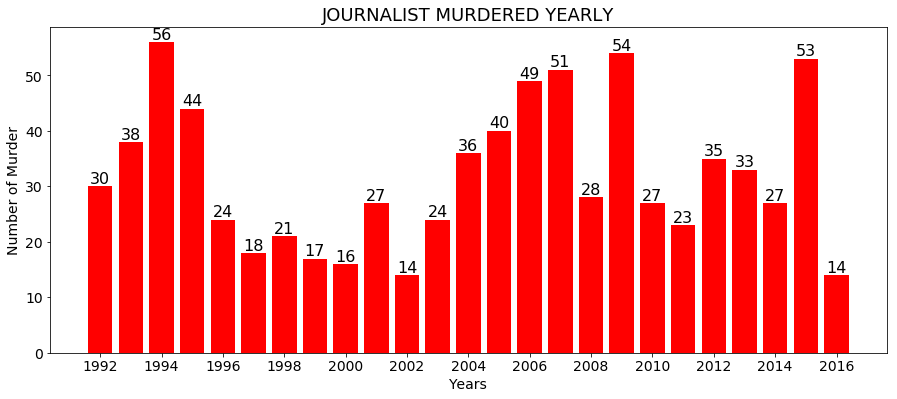

In [7]:
fig, ax = plt.subplots(figsize=(15,6))
rects = ax.bar(df_3["Year"], df_3["Count"], color='r')

plt.xticks(range(df_3["Year"].min(), df_3["Year"].max() + 2, 2))

ax.set_title('JOURNALIST MURDERED YEARLY')
ax.set_xlabel("Years")
ax.set_ylabel('Number of Murder')

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')

plt.rc('axes', titlesize=18)
plt.rc('font', size=16)
autolabel(rects)
plt.show()

In [8]:
#df_2.loc[i,"Count"]
DateRange4 = np.arange(1992,2017)
EmptyDF3 = []
i = 0
for year3 in DateRange4:
    TypeMurder = df_cpj[df_cpj['Date'].str.contains('{}'.format(year3)) & df_cpj['Type_death'].str.contains('Murder')]
    TypeCross = df_cpj[df_cpj['Date'].str.contains('{}'.format(year3)) & df_cpj['Type_death'].str.contains('Crossfire/Combat-Related')]
    TypeDanger = df_cpj[df_cpj['Date'].str.contains('{}'.format(year3)) & df_cpj['Type_death'].str.contains('Dangerous Assignment')]
#    totesinyear = df_cpj[df_cpj['Date'].str.contains('{}'.format(year3))]
    
    count3 = [year3, 100*TypeMurder['Name'].count()/df_2.loc[i,"Count"],
              100*TypeCross['Name'].count()/df_2.loc[i,"Count"],
              100*TypeDanger['Name'].count()/df_2.loc[i,"Count"], 
              100*(df_2.loc[i,"Count"] - TypeMurder['Name'].count() - TypeCross['Name'].count() - TypeDanger['Name'].count())
              /df_2.loc[i,"Count"]]
    i += 1
    EmptyDF3.append(count3)
dfcpjPer = pd.DataFrame()
dfcpjPer = dfcpjPer.append(EmptyDF3)
dfcpjPer.columns = ["Year","Murdered","Crossfire","Dangerous","Other"]

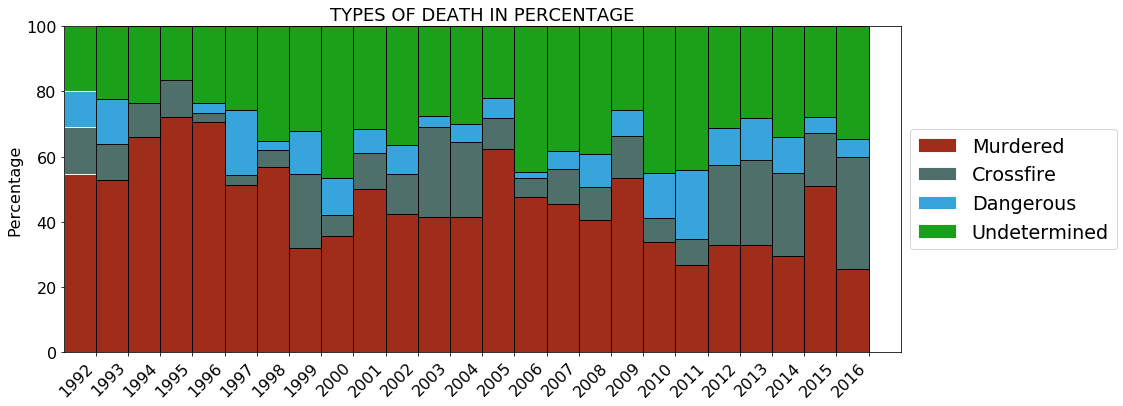

In [9]:
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(15,6))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(dfcpjPer['Murdered']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       dfcpjPer['Murdered'], 
       # labeled 
       label='Murdered', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#961600',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       dfcpjPer['Crossfire'], 
       # with pre_rel
       bottom=dfcpjPer['Murdered'], 
       # labeled 
       label='Crossfire', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#3C5F5A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       dfcpjPer['Dangerous'], 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(dfcpjPer['Murdered'], dfcpjPer['Crossfire'])], 
       # labeled 
       label='Dangerous',
       # with alpha
       alpha=0.9, 
       # with color
       color='#219AD8', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       dfcpjPer['Other'], 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(dfcpjPer['Murdered'], dfcpjPer['Crossfire'],dfcpjPer['Dangerous'])], 
       # labeled 
       label='Undetermined',
       # with alpha
       alpha=0.9, 
       # with color
       color='#019600', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, dfcpjPer['Year'])
ax.set_title('TYPES OF DEATH IN PERCENTAGE')
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-0, 100)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'large')

plt.rc('axes', titlesize=18)
plt.rc('font', size=14)

# shot plot
plt.show()


To add another prospective for better analysis. The set of data in "Undeermined" catagorie is messing up my data, they bellong in one of the other three catagories but they are still under invistication and to be determined. A solution would be to distribute "Undetermined" data points into the other three propotionatly.

In [16]:
#df_2.loc[i,"Count"]
DateRange4 = np.arange(1992,2017)
EmptyDF3 = []
i = 0
for year3 in DateRange4:
    TypeMurder = df_cpj[df_cpj['Date'].str.contains('{}'.format(year3)) & df_cpj['Type_death'].str.contains('Murder')]
    TypeCross = df_cpj[df_cpj['Date'].str.contains('{}'.format(year3)) & df_cpj['Type_death'].str.contains('Crossfire/Combat-Related')]
    TypeDanger = df_cpj[df_cpj['Date'].str.contains('{}'.format(year3)) & df_cpj['Type_death'].str.contains('Dangerous Assignment')]
    totesinyear = df_cpj[df_cpj['Date'].str.contains('{}'.format(year3))]
    
    totes = TypeMurder['Name'].count() + TypeCross['Name'].count() + TypeDanger['Name'].count()
    Typeundetermined = totesinyear['Name'].count() - totes
    
    Murder = Typeundetermined * (TypeMurder['Name'].count()/totes)
    Cross = Typeundetermined * (TypeCross['Name'].count()/totes)
    Danger = Typeundetermined * (totesinyear['Name'].count()/totes)
    
    count3 = [year3, 
              100*(TypeMurder['Name'].count() + Murder)/df_2.loc[i,"Count"],
              100*(TypeCross['Name'].count() + Cross)/df_2.loc[i,"Count"],
              100*(TypeDanger['Name'].count() + Danger)/df_2.loc[i,"Count"], ]
    
    i += 1
    EmptyDF3.append(count3)
dfcpjPer = pd.DataFrame()
dfcpjPer = dfcpjPer.append(EmptyDF3)
dfcpjPer.columns = ["Year","Murdered","Crossfire","Dangerous"]

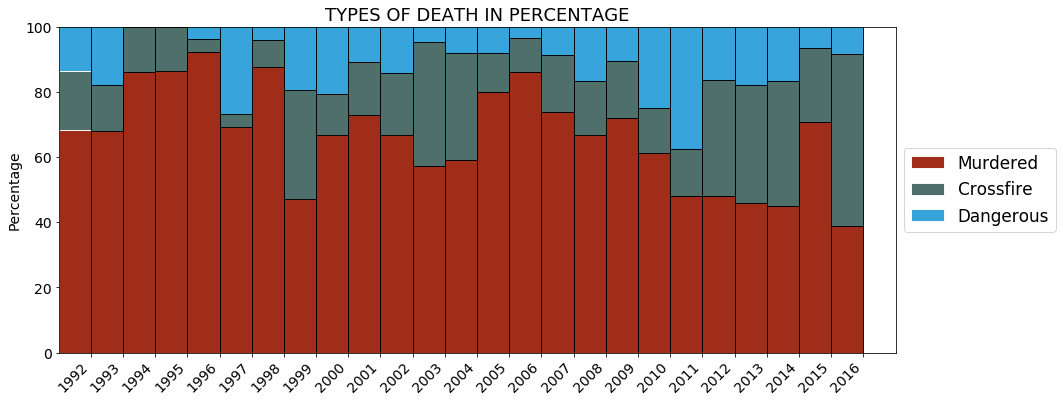

In [17]:
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(15,6))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(dfcpjPer['Murdered']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       dfcpjPer['Murdered'], 
       # labeled 
       label='Murdered', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#961600',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       dfcpjPer['Crossfire'], 
       # with pre_rel
       bottom=dfcpjPer['Murdered'], 
       # labeled 
       label='Crossfire', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#3C5F5A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       dfcpjPer['Dangerous'], 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(dfcpjPer['Murdered'], dfcpjPer['Crossfire'])], 
       # labeled 
       label='Dangerous',
       # with alpha
       alpha=0.9, 
       # with color
       color='#219AD8', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, dfcpjPer['Year'])
ax.set_title('TYPES OF DEATH IN PERCENTAGE')
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-0, 100)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'large')

plt.rc('axes', titlesize=18)
plt.rc('font', size=14)

# shot plot
plt.show()

LinregressResult(slope=-1.2068257686823087, intercept=2485.0129435382855, rvalue=-0.58752442240418723, pvalue=0.0020144210250539851, stderr=0.3465884293077206)

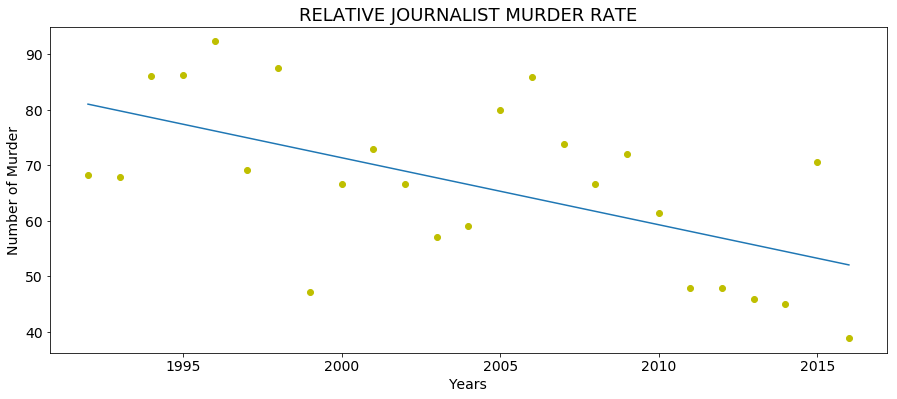

In [22]:
plt.figure(figsize=(15,6))

fit = np.polyfit(dfcpjPer["Year"], dfcpjPer['Murdered'],1)
fit_fn = np.poly1d(fit) 

plt.title('RELATIVE JOURNALIST MURDER RATE')
plt.xlabel("Years")
plt.ylabel('Number of Murder')

plt.rc('axes', titlesize=18)
plt.rc('font', size=14)


plt.plot(dfcpjPer["Year"], dfcpjPer['Murdered'], 'yo', dfcpjPer["Year"], fit_fn(dfcpjPer["Year"]))
linregress(dfcpjPer["Year"], dfcpjPer['Murdered'])

2017 was the most dangerous year ever for journalists. 2018 might be even worse.